# Lesson 4: Query Filters

In [1]:
import censusdis.data as ced
from censusdis.datasets import CBP
import censusdis.states as states
from censusdis.counties.washington import PIERCE

import pandas as pd

pd.set_option("max_colwidth", 500)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Research question

- We will return to this later

- **What was the total annual payroll of different kinds of eating and drinking establishments in Pierce County, WA in 2022?**

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## A different kind of data set

- The data sets we have been working with so far, like `ACS5` and `DECENNIAL_PUBLIC_LAW_94_171`
have one row per geography.

- In some data sets, like the County Business Patterns (CBP) data set, things can be a little different.

- One or more non-geographic variables encode constraints.

- Constraints exist in a tree encoded in numeric values
  - For example '12' is the parent of '121', '122', and '123'
  - '123' is the parent of '1231' and '1232'
  - All leaves have the same length, e.g. '123456' and '812311'

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## CBP group and variables

### CBP data set

In [2]:
ced.variables.search_data_sets(vintage=2022, pattern="CBP")

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
0,2022,CBP,cbp,2022 County Business Patterns,"County Business Patterns (CBP) is an annual series that provides sub-national economic data by industry for establishments with paid employees. This series includes the number of establishments, employment during the week of March 12, first quarter payroll, and annual payroll. Data for establishments are presented by geographic area, 2- through 6-digit NAICS industry, Legal Form of Organization (U.S. and state only), and employment size of the establishment.",http://api.census.gov/data/2022/cbp


### CBP group

CBP has only one group.

In [3]:
ced.variables.search_groups(dataset=CBP, vintage=2022)

,DATASET,YEAR,GROUP,DESCRIPTION
0,cbp,2022,CB2200CBP,"All Sectors: County Business Patterns, including ZIP Code Business Patterns, by Legal Form of Organization and Employment Size Class for the U.S., States, and Selected Geographies: 2022"


### CBP variables in the CB2200CBP group

In [4]:
ced.variables.search(CBP, 2022, group_name="CB2200CBP")

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2022,cbp,CB2200CBP,EMP,Number of employees,NaN,None
1,2022,cbp,CB2200CBP,EMPSZES,Employment size of establishments code,NaN,None
2,2022,cbp,CB2200CBP,EMPSZES_LABEL,Meaning of Employment size of establishments code,NaN,None
3,2022,cbp,CB2200CBP,EMP_F,Flag for number of employees,NaN,None
4,2022,cbp,CB2200CBP,EMP_N,Noise range for number of employees,NaN,None
5,2022,cbp,CB2200CBP,EMP_N_F,Flag for Noise range for number of employees,NaN,None
6,2022,cbp,CB2200CBP,ESTAB,Number of establishments,NaN,None
7,2022,cbp,CB2200CBP,ESTAB_F,Flag for number of establishments,NaN,None
8,2022,cbp,CB2200CBP,GEO_ID,Geographic identifier code,NaN,None
9,2022,cbp,CB2200CBP,GEO_ID_F,Geo Footnote,NaN,None


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Our first CBP query: annual payroll by county in WA

In [5]:
df_cbp_pay_annual = ced.download(
    CBP, 2022, ["NAME", "PAYANN"], state=states.WA, county="*"
)

In [6]:
df_cbp_pay_annual

,STATE,COUNTY,NAME,PAYANN
0,53,001,"Adams County, Washington",244226
1,53,003,"Asotin County, Washington",251555
2,53,005,"Benton County, Washington",4929720
3,53,007,"Chelan County, Washington",1738180
4,53,009,"Clallam County, Washington",886927
5,53,011,"Clark County, Washington",9964764
6,53,013,"Columbia County, Washington",44825
7,53,015,"Cowlitz County, Washington",1921625
8,53,017,"Douglas County, Washington",384652
9,53,019,"Ferry County, Washington",40761


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Pierce county

In [7]:
df_cbp_pierce_pay_annual = ced.download(
    CBP, 2022, ["NAME", "PAYANN"], state=states.WA, county=PIERCE
)

In [8]:
df_cbp_pierce_pay_annual

,STATE,COUNTY,NAME,PAYANN
0,53,053,"Pierce County, Washington",16671691


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Add NAICS2017

- For some reason the number of rows dramatically increases. 
- In other data sets, when we added variables, the number of columns increased,
  but the number of rows remained the same unless we changed the geography.

In [9]:
df_cbp_pierce_pay_annual_naics = ced.download(
    CBP,
    2022,
    ["NAICS2017", "NAICS2017_LABEL", "NAME", "PAYANN"],
    state=states.WA,
    county=PIERCE,
)

In [10]:
df_cbp_pierce_pay_annual_naics

,STATE,COUNTY,NAICS2017,NAICS2017_LABEL,NAME,PAYANN
0,53,053,00,Total for all sectors,"Pierce County, Washington",16671691
1,53,053,11,"Agriculture, forestry, fishing and hunting","Pierce County, Washington",19432
2,53,053,113,Forestry and logging,"Pierce County, Washington",16101
3,53,053,1133,Logging,"Pierce County, Washington",15035
4,53,053,11331,Logging,"Pierce County, Washington",15035
...,...,...,...,...,...,...
1197,53,053,81394,Political organizations,"Pierce County, Washington",2507
1198,53,053,813940,Political organizations,"Pierce County, Washington",2507
1199,53,053,81399,"Other similar organizations (except business, professional, labor, and political organizations)","Pierce County, Washington",9452
1200,53,053,813990,"Other similar organizations (except business, professional, labor, and political organizations)","Pierce County, Washington",9452


- What happened?
  - a lot of different possible values for `NAICS2017` and `NAICS2017_LABEL`
  - The same `STATE`, `COUNTY`, and `NAME` for every row
  - A different `PAYANN` for every row

- Adding the variable `NAICS2017` was a little like adding a `'*'` in a geography.
  - We got many rows
  - One row for each possible value of `NAICS2017`

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### The NAICS codes form a tree

![NAICS Tree](../images/NAICS.png)

### `'00'` is the root of the tree

- It has the same value as the total when `'NAICS2017'` was not used.

In [11]:
df_cbp_pierce_pay_annual_naics[df_cbp_pierce_pay_annual_naics["NAICS2017"] == "00"]

,STATE,COUNTY,NAICS2017,NAICS2017_LABEL,NAME,PAYANN
0,53,053,00,Total for all sectors,"Pierce County, Washington",16671691


In [12]:
df_cbp_pierce_pay_annual

,STATE,COUNTY,NAME,PAYANN
0,53,053,"Pierce County, Washington",16671691


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Walking down the tree

- The next level nodes have two digits
- But a few of the two digit ones are ranges like `31-33`, `44-45` and so on.

### Using INDLEVEL to only look at one level of the tree

We can restruct our query to just a certain level of the tree by using
an `INDLEVEL` query filter.

This is an alternative to downloading the whole tree and then looking 
through it with our own code.

In [13]:
df_cbp_pierce_indlevel = ced.download(
    CBP,
    2022,
    ["NAICS2017_LABEL", "NAME", "PAYANN"],
    state=states.WA,
    county=PIERCE,
    query_filter={
        "NAICS2017": "*",
        # Constrain to the top level of the tree.
        "INDLEVEL": 2,
    },
)

In [14]:
df_cbp_pierce_indlevel

,NAICS2017,INDLEVEL,STATE,COUNTY,NAICS2017_LABEL,NAME,PAYANN
0,00,2,53,053,Total for all sectors,"Pierce County, Washington",16671691
1,11,2,53,053,"Agriculture, forestry, fishing and hunting","Pierce County, Washington",19432
2,21,2,53,053,"Mining, quarrying, and oil and gas extraction","Pierce County, Washington",16000
3,22,2,53,053,Utilities,"Pierce County, Washington",71710
4,23,2,53,053,Construction,"Pierce County, Washington",2119750
5,31-33,2,53,053,Manufacturing,"Pierce County, Washington",1136523
6,42,2,53,053,Wholesale trade,"Pierce County, Washington",843040
7,44-45,2,53,053,Retail trade,"Pierce County, Washington",1690737
8,48-49,2,53,053,Transportation and warehousing,"Pierce County, Washington",1015137
9,51,2,53,053,Information,"Pierce County, Washington",144634


- We can look under one of the two digit nodes for three digit nodes

In [15]:
df_cbp_pierce_indlevel_3_72X = ced.download(
    CBP,
    2022,
    ["NAICS2017_LABEL", "NAME", "PAYANN"],
    state=states.WA,
    county=PIERCE,
    query_filter={
        # Only codes that start with 72:
        "NAICS2017": "72*",
        # Constrain to the second level of the tree:
        "INDLEVEL": 3,
    },
)

In [16]:
df_cbp_pierce_indlevel_3_72X

,NAICS2017,INDLEVEL,STATE,COUNTY,NAICS2017_LABEL,NAME,PAYANN
0,721,3,53,053,Accommodation,"Pierce County, Washington",104225
1,722,3,53,053,Food services and drinking places,"Pierce County, Washington",737296


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Back to our research question

### Query only part of the tree

- Only get the data for levels that start with `722*`, but get the 6-digit leaf level

In [17]:
NAICS_FOOD_AND_DRINK = "722*"

In [18]:
df_food_and_drink = ced.download(
    CBP,
    2022,
    ["NAME", "PAYANN", "NAICS2017_LABEL"],
    state=states.WA,
    county=PIERCE,
    query_filter={
        "NAICS2017": NAICS_FOOD_AND_DRINK,
        # This is the maximum level
        "INDLEVEL": 6,
    },
)

df_food_and_drink = df_food_and_drink.sort_values(by="PAYANN", ascending=False)

In [19]:
df_food_and_drink

,NAICS2017,INDLEVEL,STATE,COUNTY,NAME,PAYANN,NAICS2017_LABEL
4,722511,6,53,053,"Pierce County, Washington",349780,Full-service restaurants
5,722513,6,53,053,"Pierce County, Washington",249561,Limited-service restaurants
7,722515,6,53,053,"Pierce County, Washington",82549,Snack and nonalcoholic beverage bars
3,722410,6,53,053,"Pierce County, Washington",33820,Drinking places (alcoholic beverages)
0,722310,6,53,053,"Pierce County, Washington",11661,Food service contractors
1,722320,6,53,053,"Pierce County, Washington",6275,Caterers
2,722330,6,53,053,"Pierce County, Washington",1851,Mobile food services
6,722514,6,53,053,"Pierce County, Washington",1799,"Cafeterias, grill buffets, and buffets"


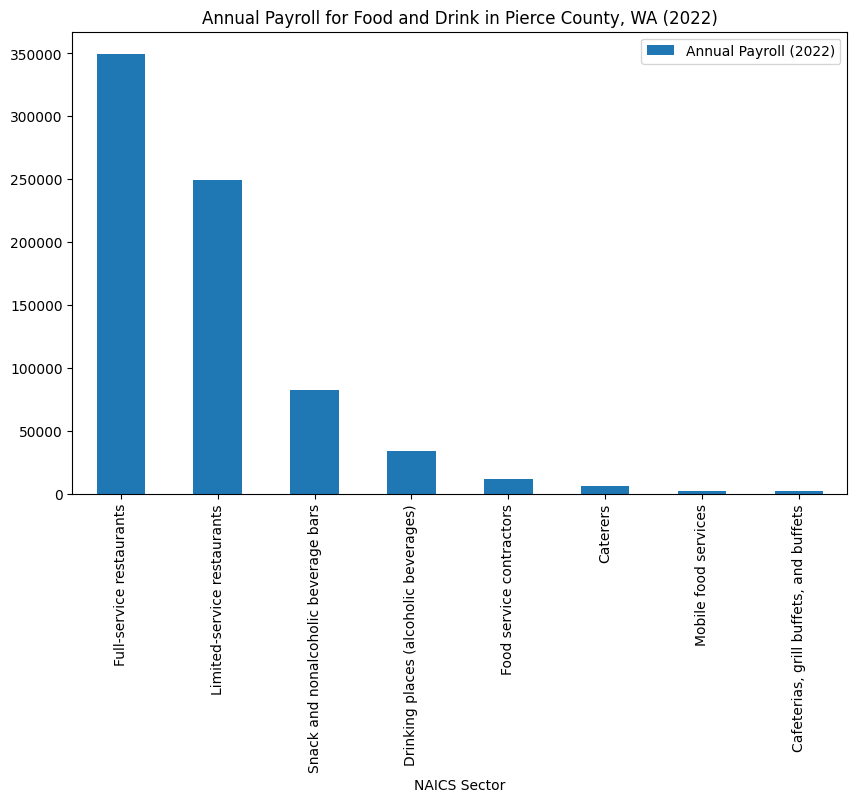

In [20]:
ax = df_food_and_drink.plot.bar(
    "NAICS2017_LABEL", "PAYANN", label="Annual Payroll (2022)", figsize=(10, 6)
)

ax.set_title("Annual Payroll for Food and Drink in Pierce County, WA (2022)")
_ = ax.set_xlabel("NAICS Sector")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Exercise 4

Now it's time to get hands-on and apply what you have learned.
[Exercise 4](../Exercises/Exercise%204.ipynb) is a notebook
where you can work with query filters.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Next Lesson

[Lesson 5: Advanced Geography](./Lesson%205%20Advanced%20Geography.ipynb)